In [26]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [27]:
import os
import glob
print(os.getcwd())

/content


In [28]:
print(os.listdir())

['.config', 'drive', 'sample_data']


In [29]:
main_path = "/content/drive/MyDrive/X_ray_Classification/data/"

train_path = os.path.join(main_path, "train")
val_path = os.path.join(main_path, "val")
test_path = os.path.join(main_path, "test")

train_normal = glob.glob(train_path+ "/normal/*.jpeg")
train_pneumonia = glob.glob(train_path + "/pneumonia/*.jpeg")

val_normal = glob.glob(val_path+ "/normal/*.jpeg")
val_pneumonia = glob.glob(val_path + "/pneumonia/*.jpeg")

test_normal = glob.glob(test_path+ "/normal/*.jpeg")
test_pneumonia = glob.glob(test_path + "/pneumonia/*.jpeg")

len(train_normal), len(train_pneumonia)

(1315, 3859)

In [30]:
import pandas as pd
import numpy as np
# train dataset
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])
print(len(train_list))
df_train = pd.DataFrame(np.concatenate([['normal']*len(train_normal), ['pneumonia']*len(train_pneumonia)]), columns=['class'])
df_train['image'] = [x for x in train_list]

# validation dataset
val_list = [x for x in val_normal]
val_list.extend([x for x in val_pneumonia])
df_val = pd.DataFrame(np.concatenate([['normal']*len(val_normal) , ['pneumonia']*len(val_pneumonia)]), columns = ['class'])
df_val['image'] = [x for x in val_list]

# test dataset
test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])
df_test = pd.DataFrame(np.concatenate([['normal']*len(test_normal) , ['pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]


5174


In [6]:
df_train

,class,image
0,normal,/content/drive/MyDrive/X_ray_Classification/da...
1,normal,/content/drive/MyDrive/X_ray_Classification/da...
2,normal,/content/drive/MyDrive/X_ray_Classification/da...
3,normal,/content/drive/MyDrive/X_ray_Classification/da...
4,normal,/content/drive/MyDrive/X_ray_Classification/da...
...,...,...
5211,pneumonia,/content/drive/MyDrive/X_ray_Classification/da...
5212,pneumonia,/content/drive/MyDrive/X_ray_Classification/da...
5213,pneumonia,/content/drive/MyDrive/X_ray_Classification/da...
5214,pneumonia,/content/drive/MyDrive/X_ray_Classification/da...


In [7]:
df_val

,class,image
0,normal,/content/drive/MyDrive/X_ray_Classification/da...
1,normal,/content/drive/MyDrive/X_ray_Classification/da...
2,normal,/content/drive/MyDrive/X_ray_Classification/da...
3,normal,/content/drive/MyDrive/X_ray_Classification/da...
4,normal,/content/drive/MyDrive/X_ray_Classification/da...
5,normal,/content/drive/MyDrive/X_ray_Classification/da...
6,normal,/content/drive/MyDrive/X_ray_Classification/da...
7,normal,/content/drive/MyDrive/X_ray_Classification/da...
8,pneumonia,/content/drive/MyDrive/X_ray_Classification/da...
9,pneumonia,/content/drive/MyDrive/X_ray_Classification/da...


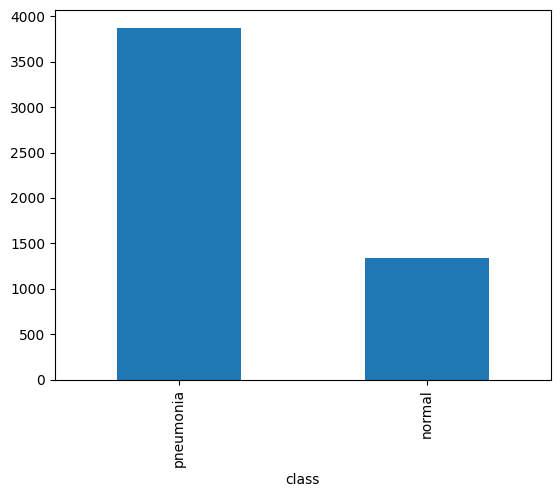

In [8]:
# Explore the data
import matplotlib.pyplot as plt

class_counts = df_train['class'].value_counts()
class_counts

class_counts.plot(kind='bar')
plt.show()

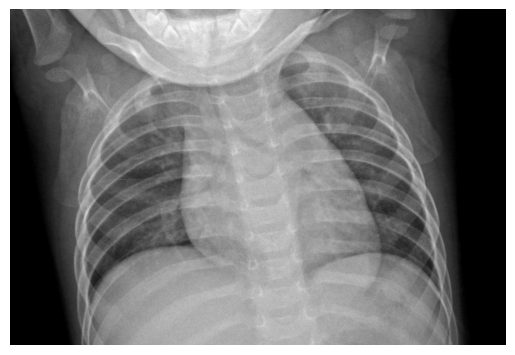

In [9]:
import cv2
img = cv2.imread(df_train['image'][1000])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [10]:
import random
for i in range(0, 10):
  index = random.randint(0, len(df_train['class']))
  img = cv2.imread(df_train['image'][index])
  print(img.shape)

(576, 976, 3)
(1064, 1248, 3)
(800, 1416, 3)
(848, 1344, 3)
(1045, 1350, 3)
(936, 1488, 3)
(792, 1168, 3)
(207, 529, 3)
(728, 1008, 3)
(1565, 1898, 3)


In [11]:
IMG_SIZE = 224
BATCH = 32


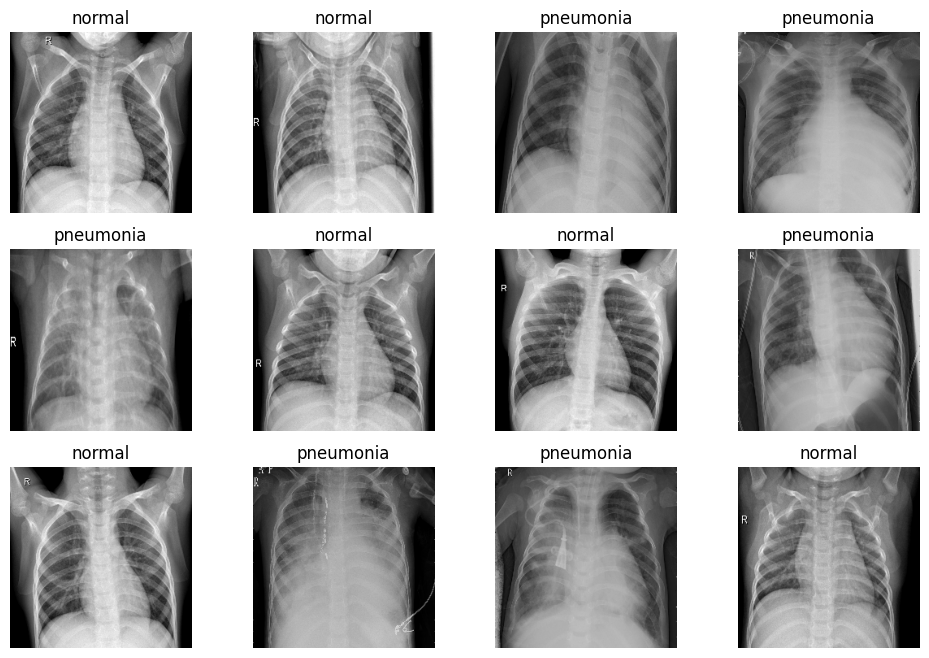

In [12]:
import cv2
random.seed(42)
plt.figure(figsize=(12,8))
for i in range(0,12):
  plt.subplot(3, 4, i+1)
  index = random.randint(1, len(df_train['class']))
  img = cv2.imread(df_train['image'][index])
  img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title(df_train['class'][index])
  plt.axis('off')


plt.show()


In [13]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))



TensorFlow version: 2.15.0
Num GPUs Available:  1


In [31]:
# Create Image data generators
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range= 40,
    width_shift_range = 0.2,
    height_shift_range =0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'

)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [32]:
# Flow Dtaa from directories
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 5164 images belonging to 2 classes.
Found 68 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [33]:
train_generator.samples

5164

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# Directory for the saved model
save_dir = "/content/drive/MyDrive/X_ray_Classification/output"

if not os.path.exists(save_dir):
  os.makedirs(save_dir)

best_model_path = os.path.join(save_dir, "best_model.h5")


# Define the checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath= best_model_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

print(f"Number of training samples: {train_generator.samples}")
print(f"Number of validation samples: {val_generator.samples}")
print(f"Number of testing samples: {test_generator.samples}")

# Ensure steps_per_epoch and validation_steps are not zero
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size

if steps_per_epoch == 0 or validation_steps == 0:
    raise ValueError("Steps per epoch or validation steps is zero. Please check your data paths and ensure they contain images.")

# Define the CNN model
with tf.device('/GPU:0'):  # Explicitly use the first GPU
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        validation_data=val_generator,
        validation_steps=validation_steps,
        epochs=10,
        callbacks = [checkpoint_callback]
    )

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
    print(f"Test accuracy: {test_acc:.4f}")


Number of training samples: 5164
Number of validation samples: 68
Number of testing samples: 624
Epoch 1/10
161/161 [==============================] - ETA: 0s - loss: 0.4345 - accuracy: 0.7954
Epoch 1: val_accuracy improved from -inf to 0.73438, saving model to /content/drive/MyDrive/X_ray_Classification/output/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


161/161 [==============================] - 138s 793ms/step - loss: 0.4345 - accuracy: 0.7954 - val_loss: 0.6020 - val_accuracy: 0.7344
Epoch 2/10
161/161 [==============================] - ETA: 0s - loss: 0.3460 - accuracy: 0.8353
Epoch 2: val_accuracy did not improve from 0.73438
161/161 [==============================] - 124s 773ms/step - loss: 0.3460 - accuracy: 0.8353 - val_loss: 0.7804 - val_accuracy: 0.7031
Epoch 3/10
161/161 [==============================] - ETA: 0s - loss: 0.3153 - accuracy: 0.8622
Epoch 3: val_accuracy did not improve from 0.73438
161/161 [==============================] - 123s 763ms/step - loss: 0.3153 - accuracy: 0.8622 - val_loss: 0.6834 - val_accuracy: 0.7344
Epoch 4/10
161/161 [==============================] - ETA: 0s - loss: 0.2986 - accuracy: 0.8646
Epoch 4: val_accuracy improved from 0.73438 to 0.78125, saving model to /content/drive/MyDrive/X_ray_Classification/output/best_model.h5
161/161 [==============================] - 127s 784ms/step - loss: 0